In [44]:
from pathlib import Path
import IPython.display
import pandas as pd
import meme_entity_detection.dataset
from tqdm import tqdm


In [45]:
tokenizer = transformers.AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
dataset = pd.read_json("../../../data/HVVMemes/annotations/train.jsonl", lines=True)
dataset["OCR"] = dataset["OCR"].str.replace("\n", " ")

/home/workstation/Dokumente/GitHub/Entity-Role-Detection-in-Memes/.venv/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:562: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [48]:
dataset["OCR Tokens"] = [len(tokenizer(val)['input_ids']) for val in  tqdm(dataset["OCR"].values)]

100%|██████████| 5552/5552 [00:00<00:00, 16845.33it/s]


In [85]:
dataset = dataset[dataset["dataset full"].apply(lambda x: type(x) == str)]
dataset["dataset full"] = dataset["OCR GPT-4o"] + " [SEP] " + dataset["IMAGE DESCRIPTION GPT-4o"] 
dataset["Full OCR Tokens"] = [len(tokenizer(val)['input_ids']) for val in tqdm(dataset["dataset full"].values)]

<Axes: ylabel='Density'>

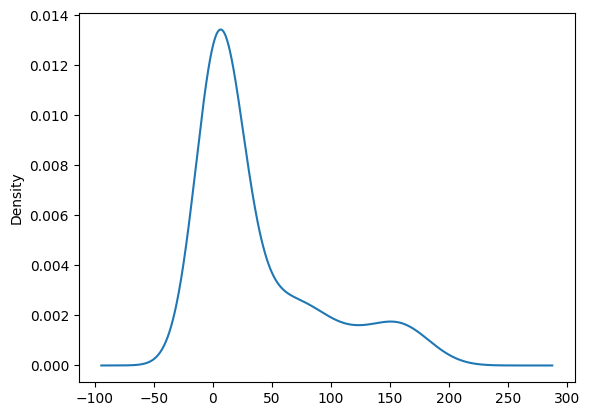

In [97]:
dataset["OCR Tokens"].value_counts().sort_index().plot(kind="kde")

100%|██████████| 5357/5357 [00:00<00:00, 18136.13it/s]
/tmp/ipykernel_73197/1608703105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["OCR GPT-4o Tokens"] = [len(tokenizer(val)['input_ids']) for val in tqdm(dataset["OCR GPT-4o"].values)]


<Axes: ylabel='Density'>

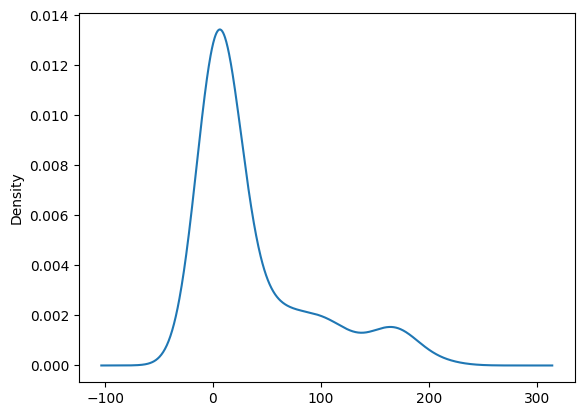

In [101]:
dataset["OCR GPT-4o Tokens"] = [len(tokenizer(val)['input_ids']) for val in tqdm(dataset["OCR GPT-4o"].values)]
dataset["OCR GPT-4o Tokens"].value_counts().sort_index().plot(kind="kde")

In [100]:
dataset["OCR GPT-4o"]

0       REALTOR: CAN YOU SEE YOURSELF BEING QUARANTINE...
1       When you connect your charger on 1% charge but...
2                   TYT REACTS: FIRST PRESIDENTIAL DEBATE
3       The Democratic Party is socialist. I am the De...
4       EVERY\nDISASTER\nMOVIE STARTS\nWITH THE\nGOVER...
                              ...                        
5547    A MONTH INTO WORKING FROM HOME\n"WHAT DAY IS IT?"
5548    LIBERTARIANS\nwhat /pol/ thinks we are\nI am g...
5549    IF WE PASS MORE GUN LAWS\nCRIME WILL GO AWAY\n...
5550    BARACK OBAMA: SPENDS 8 YEARS WHINING ABOUT "IN...
5551    Ladies, find you a man who loves you as much a...
Name: OCR GPT-4o, Length: 5357, dtype: object

<Axes: ylabel='Density'>

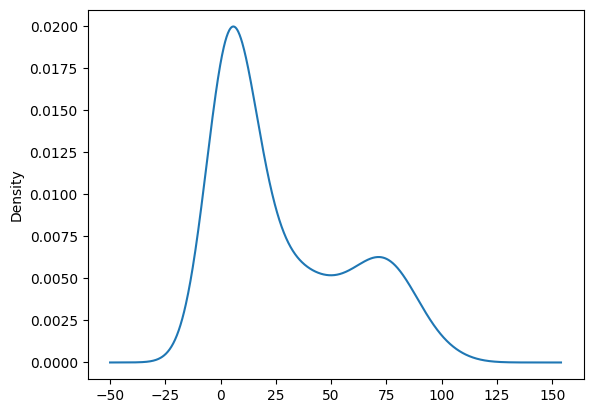

In [98]:
dataset["Full OCR Tokens"].value_counts().sort_index().plot(kind="kde")